## Simulación del intervalo de confianza como variable aleatoria

Supongamos que tenemos un experimento aleatorio que genera una VA normal con media $\mu$ y varianza $\sigma^2$.  Generamos mediante simulación muestras aleatorias de tamaño N y vemos qué pasa con los intervalos de confianza de un nivel de confianza $1-\alpha$.

In [1]:
mu = 10         # parámetros de la gaussiana
sigma = 4

alpha = 0.07   # nivel de confianza
N = 10         # Tamaño de la muestra
M = 100        # cantidad de experimentos

q1 = alpha/2
q2 = 1 - q1

In [2]:
x = seq(mu-3*sigma, mu+3*sigma, l=100)
y = dnorm(x,mu,sigma)

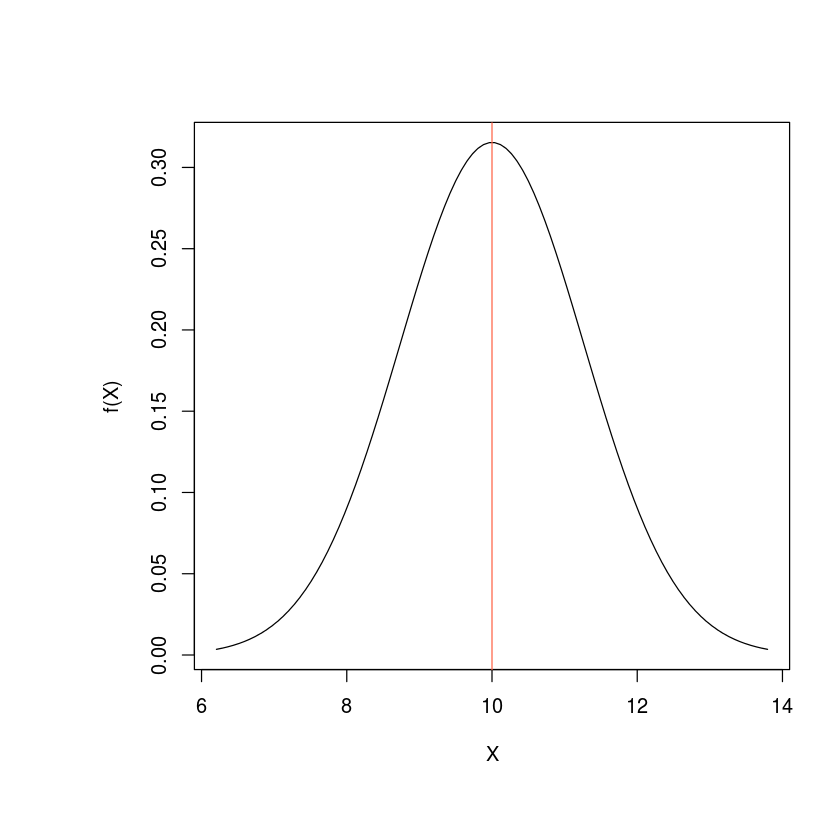

In [15]:
par(mar=c(5,6,4,1)+.1)
par(oma=c(2,2,1,1))

plot(x,y,type='l', xlab='X', ylab='f(X)')
abline(v=mu, col='tomato')

La distribución esperada de la media es $N(\mu, \frac{\sigma^2}{N})$

In [4]:
Sn = sigma / sqrt(N)
x = seq(mu-3*Sn, mu+3*Sn, l=100)
y = dnorm(x,mu,Sn)

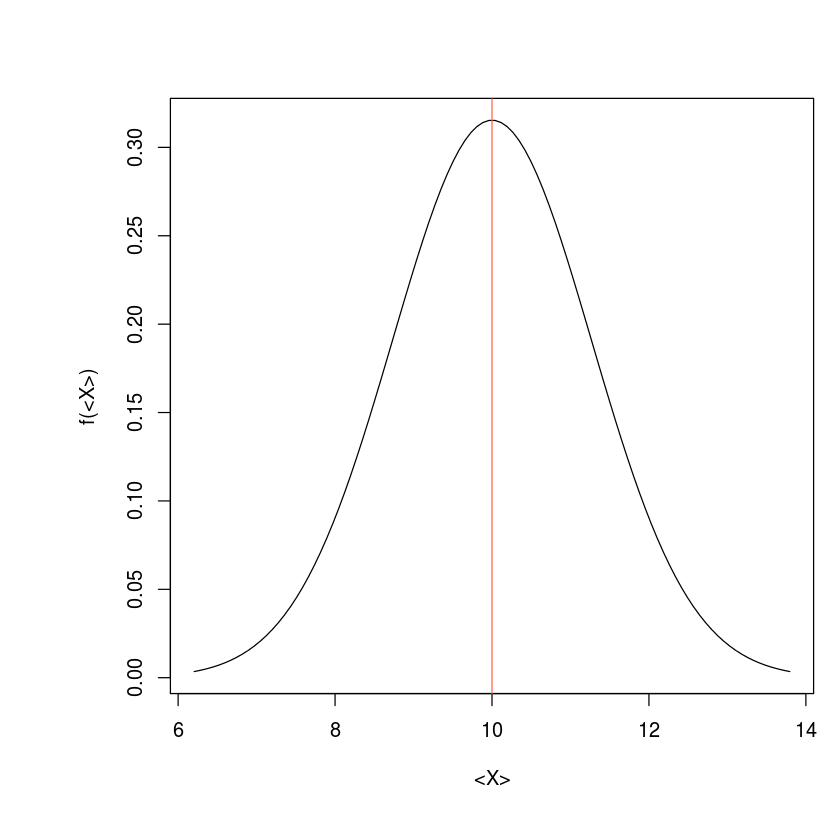

In [18]:
par(oma=c(1,1,0,0))
par(mar=c(5,6,4,1)+.1)
plot(x,y,type='l',xlab='<X>',ylab='f(<X>)')
abline(v=mu, col='tomato')

In [19]:
l = as.numeric(); r = as.numeric(); t = as.logical()
for (i in 1:M) {
   x = rnorm(N, mu, sigma)
   l = c(l, qnorm(q1,mean(x),sd(x)/sqrt(N))[1])
   r = c(r, qnorm(q2,mean(x),sd(x)/sqrt(N))[1])
   t = c(t, tail(l,1)<mu & tail(r,1)>mu)
}

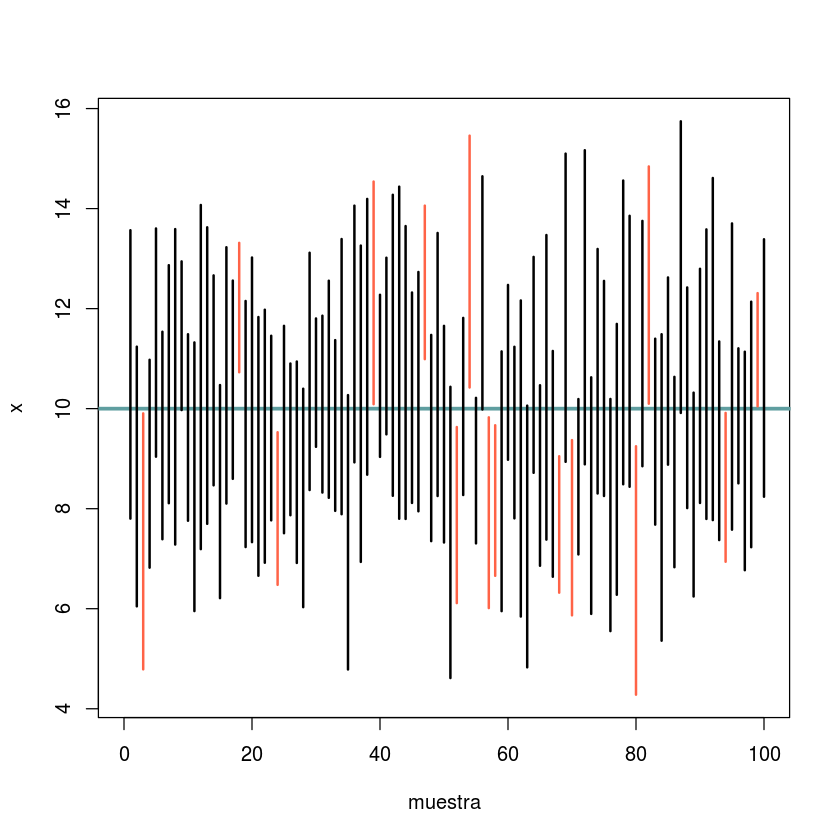

In [20]:
ymin = min(l)
ymax = max(r)
plot(0,0,xlim=c(0,M),ylim=c(ymin, ymax),xlab='muestra',ylab='x')
abline(h=mu, col='cadetblue', lw=3)
for (i in 1:M) {
    if(t[i]) {segments(i,l[i],i,r[i], lwd=2, col='black')}
    if(!t[i]) {segments(i,l[i],i,r[i], lwd=2, col='tomato')}
}

In [21]:
# La fraccion de intervalos que contienen a la media:
sum(t)/length(t)

[1] 0.85

In [22]:
1 - alpha

[1] 0.93

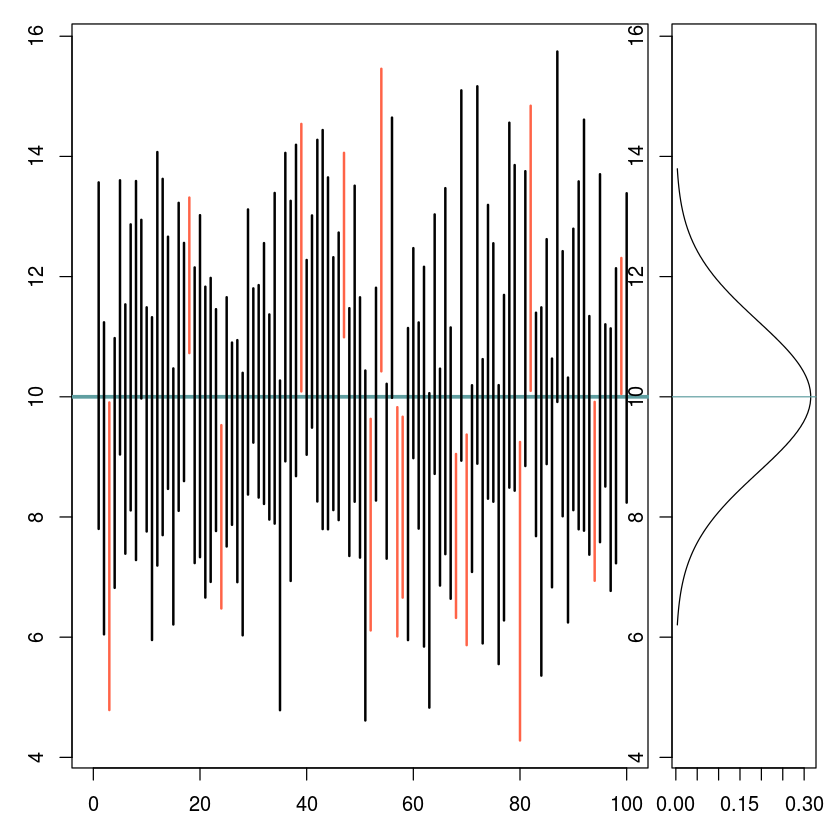

In [23]:
zones=matrix(c(1,2), ncol=2, byrow=TRUE)
layout(zones, widths=c(4/5,1/5), heights=c(1/5,4/5))

par(mar=c(3,3,1,1))
ymin = min(l)
ymax = max(r)
plot(0,0,xlim=c(0,M),ylim=c(ymin, ymax),xlab='muestra',ylab='x')
abline(h=mu, col='cadetblue', lw=3)
for (i in 1:M) {
    if(t[i]) {segments(i,l[i],i,r[i], lwd=2, col='black')}
    if(!t[i]) {segments(i,l[i],i,r[i], lwd=2, col='tomato')}
}

par(mar=c(3,0,1,1))
Sn = sigma / sqrt(N)
x = seq(mu-3*Sn, mu+3*Sn, l=100)
y = dnorm(x,mu,Sn)
plot(y,x,type='l',ylim=c(ymin, ymax))
abline(h=mu, col='cadetblue')

par(oma=c(3,3,0,0))